In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np


In [2]:
from google.colab import files

# This will prompt you to upload the zip file from your local machine
uploaded =files.upload()

Saving Dataset Brain Tumor.zip to Dataset Brain Tumor.zip


In [3]:
import zipfile
import os

# Specify the name of the uploaded zip file
zip_file_name = 'Dataset Brain Tumor.zip'  # Change this if your zip file name is different

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('Dataset Brain Tumor')

# Verify the contents of the unzipped directory
os.listdir('Dataset Brain Tumor')

['Dataset Brain Tumor']

In [4]:
# Set paths
train_dir = '/content/Dataset Brain Tumor/Dataset Brain Tumor/Training Dataset'
test_dir = '/content/Dataset Brain Tumor/Dataset Brain Tumor/Testing Dataset'

# Define image size and batch size
image_size = (240, 240)
batch_size = 32

# Training data generator with augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Testing data generator without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 5708 images belonging to 4 classes.
Found 1273 images belonging to 4 classes.


In [5]:
from tensorflow.keras import layers, models

def create_cnn_model_with_tanh_fc(input_shape):
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # Fully Connected Layer with Tanh Activation
    model.add(layers.Dense(128, activation='tanh'))

    # Output Layer with Softmax Activation
    model.add(layers.Dense(4, activation='softmax'))

    return model

# Input shape
input_shape = (240, 240, 3)  # Assuming RGB images

# Create the model
model_tanh_fc = create_cnn_model_with_tanh_fc(input_shape)

# Compile the model
model_tanh_fc.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Model summary
model_tanh_fc.summary()

history = model_tanh_fc.fit(
    train_generator,
    epochs=30,  # Adjust based on your needs
    validation_data=test_generator
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 236, 236, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 118, 118, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 114, 114, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 57, 57, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 53, 53, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,334,852 (43.24 MB)

 Trainable params: 11,334,852 (43.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 475ms/step - accuracy: 0.4349 - loss: 1.3124 - val_accuracy: 0.6481 - val_loss: 0.9641
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 125s 433ms/step - accuracy: 0.6770 - loss: 0.8161 - val_accuracy: 0.6991 - val_loss: 0.7511
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 430ms/step - accuracy: 0.7085 - loss: 0.7176 - val_accuracy: 0.6929 - val_loss: 0.7066
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 429ms/step - accuracy: 0.7350 - loss: 0.6712 - val_accuracy: 0.7258 - val_loss: 0.7503
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 431ms/step - accuracy: 0.7494 - loss: 0.6205 - val_accuracy: 0.7541 - val_loss: 0.5676
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 80s 432ms/step - accuracy: 0.7760 - loss: 0.5730 - val_accuracy: 0.7172 - val_loss: 0.7366
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 83s 441ms/step - accuracy: 0.7800 - loss: 0.5547 - val_accuracy: 0.7211 - val_loss: 0.7166
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 430ms/step - accuracy: 0.7859 - loss: 0.5260 - va

In [6]:
# Evaluate on test data
test_loss, test_acc = model_tanh_fc.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Predict the probabilities for test data
y_pred = model_tanh_fc.predict(test_generator)
y_true = test_generator.classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# AUC Score
auc = roc_auc_score(y_true, y_pred, multi_class='ovr')
print(f'AUC Score: {auc:.4f}')


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7934 - loss: 0.4681
Test Accuracy: 0.8594
Test Loss: 0.3513
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.89      0.77      0.83       262
  meningioma       0.75      0.70      0.72       306
     notumor       0.87      0.99      0.92       405
   pituitary       0.93      0.93      0.93       300

    accuracy                           0.86      1273
   macro avg       0.86      0.85      0.85      1273
weighted avg       0.86      0.86      0.86      1273

AUC Score: 0.9724


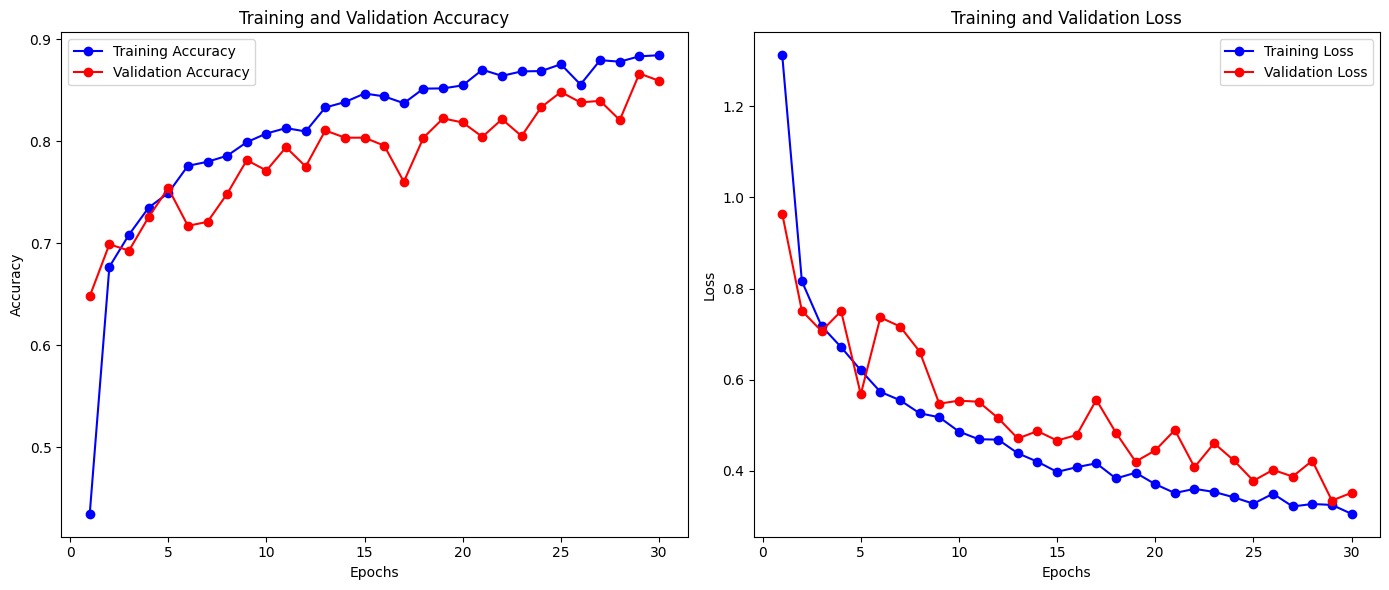

In [7]:
import matplotlib.pyplot as plt

# Extract metrics from history
epochs = range(1, 31)  # Assuming 30 epochs

train_acc = [0.4349, 0.6770, 0.7085, 0.7350, 0.7494, 0.7760, 0.7800, 0.7859, 0.7992, 0.8077, 0.8130, 0.8097, 0.8332, 0.8385, 0.8469, 0.8441, 0.8374, 0.8517, 0.8519, 0.8549, 0.8702, 0.8642, 0.8686, 0.8689, 0.8756, 0.8557, 0.8796, 0.8781, 0.8834, 0.8844]
val_acc = [0.6481, 0.6991, 0.6929, 0.7258, 0.7541, 0.7172, 0.7211, 0.7486, 0.7816, 0.7714, 0.7942, 0.7753, 0.8107, 0.8036, 0.8036, 0.7958, 0.7604, 0.8036, 0.8225, 0.8185, 0.8044, 0.8217, 0.8052, 0.8335, 0.8484, 0.8382, 0.8397, 0.8209, 0.8665, 0.8594]

train_loss = [1.3124, 0.8161, 0.7176, 0.6712, 0.6205, 0.5730, 0.5547, 0.5260, 0.5173, 0.4859, 0.4690, 0.4681, 0.4381, 0.4196, 0.3972, 0.4076, 0.4161, 0.3828, 0.3954, 0.3703, 0.3508, 0.3600, 0.3532, 0.3415, 0.3274, 0.3493, 0.3213, 0.3267, 0.3247, 0.3052]
val_loss = [0.9641, 0.7511, 0.7066, 0.7503, 0.5676, 0.7366, 0.7166, 0.6616, 0.5471, 0.5537, 0.5514, 0.5153, 0.4707, 0.4868, 0.4661, 0.4783, 0.5555, 0.4831, 0.4198, 0.4445, 0.4892, 0.4076, 0.4602, 0.4226, 0.3776, 0.4017, 0.3871, 0.4217, 0.3343, 0.3513]

# Create plots
plt.figure(figsize=(14, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()
